## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
from tensorflow.python import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\pyth

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 94us/sample - loss: 2.2615 - accuracy: 0.1457 - val_loss: 2.2099 - val_accuracy: 0.1727
Epoch 2/500
50000/50000 [==============================] - 4s 75us/sample - loss: 2.1720 - accuracy: 0.2025 - val_loss: 2.1375 - val_accuracy: 0.2299
Epoch 3/500
50000/50000 [==============================] - 4s 76us/sample - loss: 2.1091 - accuracy: 0.2415 - val_loss: 2.0852 - val_accuracy: 0.2526
Epoch 4/500
50000/50000 [==============================] - 4s 74us/sample - loss: 2.0628 - accuracy: 0.2664 - val_loss: 2.0448 - val_accuracy: 0.2697
Epoch 5/500
50000/50000 [==============================] - 4s 73us/sample - loss: 2.0270 - accuracy: 0.2818 - val_loss: 2.0129 - val_accuracy: 0.2857
Epoch 6/500
50000/50000 [==============================] - 4s 78us/sample - loss: 1.9988 - accuracy: 0.293

Epoch 53/500
50000/50000 [==============================] - 4s 71us/sample - loss: 1.6777 - accuracy: 0.4178 - val_loss: 1.6835 - val_accuracy: 0.4120
Epoch 54/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.6741 - accuracy: 0.4179 - val_loss: 1.6807 - val_accuracy: 0.4125
Epoch 55/500
50000/50000 [==============================] - 4s 73us/sample - loss: 1.6711 - accuracy: 0.4192 - val_loss: 1.6779 - val_accuracy: 0.4110
Epoch 56/500
50000/50000 [==============================] - 3s 69us/sample - loss: 1.6681 - accuracy: 0.4192 - val_loss: 1.6745 - val_accuracy: 0.4162
Epoch 57/500
50000/50000 [==============================] - 3s 68us/sample - loss: 1.6650 - accuracy: 0.4203 - val_loss: 1.6719 - val_accuracy: 0.4158
Epoch 58/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.6618 - accuracy: 0.4221 - val_loss: 1.6726 - val_accuracy: 0.4119
Epoch 59/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.6588 - ac

50000/50000 [==============================] - 4s 70us/sample - loss: 1.5433 - accuracy: 0.4631 - val_loss: 1.5638 - val_accuracy: 0.4513
Epoch 108/500
50000/50000 [==============================] - 3s 70us/sample - loss: 1.5413 - accuracy: 0.4652 - val_loss: 1.5633 - val_accuracy: 0.4547
Epoch 109/500
50000/50000 [==============================] - 3s 70us/sample - loss: 1.5392 - accuracy: 0.4650 - val_loss: 1.5639 - val_accuracy: 0.4527
Epoch 110/500
50000/50000 [==============================] - 3s 68us/sample - loss: 1.5377 - accuracy: 0.4667 - val_loss: 1.5638 - val_accuracy: 0.4487
Epoch 111/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.5356 - accuracy: 0.4656 - val_loss: 1.5613 - val_accuracy: 0.4482
Epoch 112/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.5332 - accuracy: 0.4686 - val_loss: 1.5560 - val_accuracy: 0.4522
Epoch 113/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.5317 - accuracy:

Epoch 161/500
50000/50000 [==============================] - 3s 69us/sample - loss: 1.4495 - accuracy: 0.4941 - val_loss: 1.4946 - val_accuracy: 0.4721
Epoch 162/500
50000/50000 [==============================] - 3s 69us/sample - loss: 1.4479 - accuracy: 0.4951 - val_loss: 1.4978 - val_accuracy: 0.4657
Epoch 163/500
50000/50000 [==============================] - 3s 69us/sample - loss: 1.4466 - accuracy: 0.4959 - val_loss: 1.4936 - val_accuracy: 0.4708
Epoch 164/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.4452 - accuracy: 0.4954 - val_loss: 1.4881 - val_accuracy: 0.4726
Epoch 165/500
50000/50000 [==============================] - 3s 69us/sample - loss: 1.4430 - accuracy: 0.4980 - val_loss: 1.4875 - val_accuracy: 0.4727
Epoch 166/500
50000/50000 [==============================] - 4s 72us/sample - loss: 1.4415 - accuracy: 0.4978 - val_loss: 1.4911 - val_accuracy: 0.4701
Epoch 167/500
50000/50000 [==============================] - 4s 71us/sample - loss: 1.44

Epoch 215/500
50000/50000 [==============================] - 3s 57us/sample - loss: 1.3693 - accuracy: 0.5221 - val_loss: 1.4423 - val_accuracy: 0.4919
Epoch 216/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.3683 - accuracy: 0.5221 - val_loss: 1.4410 - val_accuracy: 0.4869
Epoch 217/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.3661 - accuracy: 0.5235 - val_loss: 1.4410 - val_accuracy: 0.4889
Epoch 218/500
50000/50000 [==============================] - 3s 68us/sample - loss: 1.3649 - accuracy: 0.5226 - val_loss: 1.4462 - val_accuracy: 0.4805
Epoch 219/500
50000/50000 [==============================] - 3s 68us/sample - loss: 1.3631 - accuracy: 0.5247 - val_loss: 1.4349 - val_accuracy: 0.4917
Epoch 220/500
50000/50000 [==============================] - 3s 68us/sample - loss: 1.3622 - accuracy: 0.5259 - val_loss: 1.4485 - val_accuracy: 0.4856
Epoch 221/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.36

Epoch 269/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.2980 - accuracy: 0.5474 - val_loss: 1.4147 - val_accuracy: 0.4913
Epoch 270/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.2969 - accuracy: 0.5471 - val_loss: 1.4137 - val_accuracy: 0.4971
Epoch 271/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.2963 - accuracy: 0.5481 - val_loss: 1.4070 - val_accuracy: 0.4976
Epoch 272/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.2942 - accuracy: 0.5471 - val_loss: 1.4190 - val_accuracy: 0.4975
Epoch 273/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.2934 - accuracy: 0.5489 - val_loss: 1.4078 - val_accuracy: 0.4971
Epoch 274/500
50000/50000 [==============================] - 3s 68us/sample - loss: 1.2930 - accuracy: 0.5498 - val_loss: 1.4094 - val_accuracy: 0.4976
Epoch 275/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.29

Epoch 323/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.2351 - accuracy: 0.5689 - val_loss: 1.4033 - val_accuracy: 0.4938
Epoch 324/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.2347 - accuracy: 0.5700 - val_loss: 1.3704 - val_accuracy: 0.5105
Epoch 325/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.2334 - accuracy: 0.5691 - val_loss: 1.3691 - val_accuracy: 0.5089
Epoch 326/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.2311 - accuracy: 0.5698 - val_loss: 1.3753 - val_accuracy: 0.5076
Epoch 327/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.2303 - accuracy: 0.5713 - val_loss: 1.3737 - val_accuracy: 0.5056
Epoch 328/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.2288 - accuracy: 0.5717 - val_loss: 1.3758 - val_accuracy: 0.5104
Epoch 329/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.22

Epoch 377/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1766 - accuracy: 0.5900 - val_loss: 1.3650 - val_accuracy: 0.5068
Epoch 378/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1755 - accuracy: 0.5909 - val_loss: 1.3576 - val_accuracy: 0.5139
Epoch 379/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1748 - accuracy: 0.5900 - val_loss: 1.3580 - val_accuracy: 0.5140
Epoch 380/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1724 - accuracy: 0.5917 - val_loss: 1.3810 - val_accuracy: 0.5101
Epoch 381/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.1720 - accuracy: 0.5914 - val_loss: 1.3512 - val_accuracy: 0.5152
Epoch 382/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.1695 - accuracy: 0.5916 - val_loss: 1.4174 - val_accuracy: 0.5018
Epoch 383/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.16

Epoch 431/500
50000/50000 [==============================] - 3s 64us/sample - loss: 1.1193 - accuracy: 0.6100 - val_loss: 1.3460 - val_accuracy: 0.5193
Epoch 432/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1196 - accuracy: 0.6104 - val_loss: 1.3578 - val_accuracy: 0.5175
Epoch 433/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1184 - accuracy: 0.6105 - val_loss: 1.3437 - val_accuracy: 0.5159
Epoch 434/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1185 - accuracy: 0.6106 - val_loss: 1.3879 - val_accuracy: 0.5089
Epoch 435/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1148 - accuracy: 0.6130 - val_loss: 1.3764 - val_accuracy: 0.5148
Epoch 436/500
50000/50000 [==============================] - 3s 67us/sample - loss: 1.1167 - accuracy: 0.6104 - val_loss: 1.3506 - val_accuracy: 0.5192
Epoch 437/500
50000/50000 [==============================] - 3s 66us/sample - loss: 1.11

Epoch 485/500
50000/50000 [==============================] - 3s 55us/sample - loss: 1.0653 - accuracy: 0.6300 - val_loss: 1.3431 - val_accuracy: 0.5220
Epoch 486/500
50000/50000 [==============================] - 3s 54us/sample - loss: 1.0639 - accuracy: 0.6304 - val_loss: 1.3828 - val_accuracy: 0.5118
Epoch 487/500
50000/50000 [==============================] - 3s 55us/sample - loss: 1.0640 - accuracy: 0.6294 - val_loss: 1.3423 - val_accuracy: 0.5236
Epoch 488/500
50000/50000 [==============================] - 3s 55us/sample - loss: 1.0651 - accuracy: 0.6294 - val_loss: 1.3268 - val_accuracy: 0.5265
Epoch 489/500
50000/50000 [==============================] - 3s 55us/sample - loss: 1.0609 - accuracy: 0.6315 - val_loss: 1.3512 - val_accuracy: 0.5193
Epoch 490/500
50000/50000 [==============================] - 3s 56us/sample - loss: 1.0628 - accuracy: 0.6308 - val_loss: 1.3388 - val_accuracy: 0.5239
Epoch 491/500
50000/50000 [==============================] - 3s 55us/sample - loss: 1.06

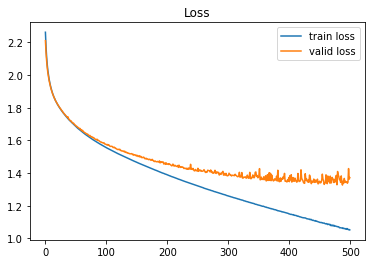

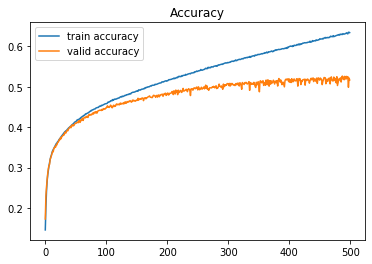

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()